<a href="https://colab.research.google.com/github/bsun1220/UCBTradingComp2022/blob/main/UCBerkeley2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob
import zipfile
import functools

In [ ]:
import os

# Upload the API token.
def get_kaggle_credentials():
  token_dir = os.path.join(os.path.expanduser("~"),".kaggle")
  token_file = os.path.join(token_dir, "kaggle.json")
  if not os.path.isdir(token_dir):
    os.mkdir(token_dir)
  try:
    with open(token_file,'r') as f:
      pass
  except IOError as no_file:
    try:
      from google.colab import files
    except ImportError:
      raise no_file
  uploaded = files.upload()
  if "kaggle.json" not in uploaded:
      raise ValueError("You need an API key! see: "
          "https://github.com/Kaggle/kaggle-api#api-credentials")
  with open(token_file, "wb") as f:
    f.write(uploaded["kaggle.json"])
  os.chmod(token_file, 600)

get_kaggle_credentials()

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle competitions download -c berkeleytradingcompetition2022

  0% 0.00/3.31M [00:00<?, ?B/s]
100% 3.31M/3.31M [00:00<00:00, 109MB/s]
 44% 5.00M/11.4M [00:00<00:00, 31.9MB/s]
100% 11.4M/11.4M [00:00<00:00, 45.1MB/s]


In [ ]:
!unzip test.csv.zip
!unzip train.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                
Archive:  train.csv.zip
  inflating: train.csv               


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
train.corr()["realized edge"]

trade id                0.001645
pred edge               0.567768
price                   0.087361
size                   -0.032801
sm sentiment            0.003891
sm sentiment (naive)    0.001847
realized edge           1.000000
pnl                     0.853414
pos                    -0.006118
Name: realized edge, dtype: float64

In [ ]:
train["pos"] = np.where(train["dir"] == "S", -1, 1)
train

,trade id,pred edge,stock,location,price,size,dir,counterparty,counterparty (naive),sm sentiment,sm sentiment (naive),realized edge,pnl,pos
0,0,18.145986,B,CSE,98.507314,36.0,S,HF,MF,2.144241,-89.167775,-4.007551,-1.421183,-1
1,1,14.414018,C,CSE,14.935761,1094.0,S,HF,R,-94.202156,83.379633,-3.716749,-6.073064,-1
2,2,12.306395,B,NYSE,99.818500,7.0,S,R,R,27.572105,27.572105,11.867307,0.829204,-1
3,3,0.553884,B,CSE,100.459287,59.0,B,HF,MF,-45.020574,-40.040991,-16.951884,-10.047548,1
4,4,5.020094,C,NASDAQ,15.209969,449.0,S,MF,HF,22.575639,22.575639,-2.337918,-1.596629,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,1.035089,B,NYSE,98.290999,148.0,S,R,R,47.282761,74.037358,-4.003388,-5.823755,-1
199996,199996,3.668662,C,NASDAQ,15.003929,327.0,S,MF,MF,-59.582576,-66.851010,0.522307,0.256259,-1
199997,199997,8.910650,D,NYSE,2020.034449,2.0,S,R,R,96.035708,96.035708,-25.712969,-10.388217,-1
199998,199998,4.287823,B,NYSE,99.224065,127.0,S,R,MF,-90.732796,-90.732796,3.013510,3.797461,-1


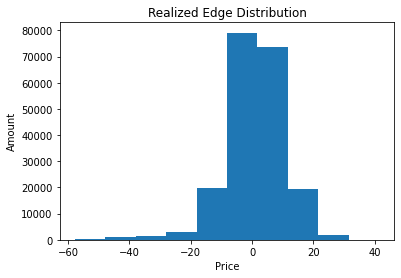

In [ ]:
#Distribution of Realized Edge
plt.xlabel("Price")
plt.ylabel("Amount")
plt.title("Realized Edge Distribution")
plt.hist(train["realized edge"])
plt.show()

In [ ]:
#Differences between stock and location compared to realized edge
train.groupby(["stock", "location"]).describe()["realized edge"]

count      mean       std  ...       50%        75%        max
stock location                               ...                                
A     CSE        8042.0 -3.288291  9.106696  ... -2.973064   2.158963  32.036267
      NASDAQ    16189.0  1.017084  9.351674  ...  1.403267   6.573545  39.875108
      NYSE      16028.0  1.635968  9.324402  ...  2.055138   7.216345  36.417465
B     CSE       11915.0 -4.550731  9.067119  ... -4.379188   0.682337  32.456326
      NASDAQ    23929.0 -0.036353  8.854016  ...  0.147829   5.153274  41.449102
      NYSE      24030.0  0.292825  9.075640  ...  0.488313   5.675677  34.694225
C     CSE       14040.0 -1.967294  9.125839  ... -1.598576   3.517193  29.418025
      NASDAQ    27972.0  2.610949  9.202243  ...  2.948395   8.076302  38.359101
      NYSE      27804.0  3.132766  9.245072  ...  3.497789   8.668993  37.213677
D     CSE        6050.0 -0.573445  9.598938  ...  0.028517   5.452466  30.899993
      NASDAQ    12088.0  3.767430  9.715753  ...  4.397112   9.870739  35.074368
      NYSE      11913.0  4.211615  9.566164  ...  4.848989  10.283209  38.284502

[12 rows x 8 columns]

In [ ]:
train.groupby(["counterparty"]).describe()["realized edge"]

,count,mean,std,min,25%,50%,75%,max
counterparty,,,,,,,,
HF,39955.0,-4.788423,7.210177,-31.135150,-9.556754,-5.175668,-0.295209,33.385735
MF,90056.0,1.414207,7.007138,-28.533587,-3.293829,0.922837,5.724688,35.911440
R,69989.0,3.670736,11.816990,-57.767760,0.323496,5.201257,10.230990,41.449102


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
train

,trade id,pred edge,stock,location,price,size,dir,counterparty,counterparty (naive),sm sentiment,sm sentiment (naive),realized edge,pnl,pos
0,0,18.145986,B,CSE,98.507314,36.0,S,HF,MF,2.144241,-89.167775,-4.007551,-1.421183,-1
1,1,14.414018,C,CSE,14.935761,1094.0,S,HF,R,-94.202156,83.379633,-3.716749,-6.073064,-1
2,2,12.306395,B,NYSE,99.818500,7.0,S,R,R,27.572105,27.572105,11.867307,0.829204,-1
3,3,0.553884,B,CSE,100.459287,59.0,B,HF,MF,-45.020574,-40.040991,-16.951884,-10.047548,1
4,4,5.020094,C,NASDAQ,15.209969,449.0,S,MF,HF,22.575639,22.575639,-2.337918,-1.596629,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,1.035089,B,NYSE,98.290999,148.0,S,R,R,47.282761,74.037358,-4.003388,-5.823755,-1
199996,199996,3.668662,C,NASDAQ,15.003929,327.0,S,MF,MF,-59.582576,-66.851010,0.522307,0.256259,-1
199997,199997,8.910650,D,NYSE,2020.034449,2.0,S,R,R,96.035708,96.035708,-25.712969,-10.388217,-1
199998,199998,4.287823,B,NYSE,99.224065,127.0,S,R,MF,-90.732796,-90.732796,3.013510,3.797461,-1


In [51]:
raw_data = pd.read_csv('train.csv')

In [53]:
raw_data = raw_data.assign(diff = raw_data['realized edge']-raw_data['pred edge'])
data_by_counterparty = dict()
for i in ['HF','MF','R']:
    data_by_counterparty[i] = raw_data[raw_data['counterparty']==i]

accurate_preds = raw_data[np.abs(raw_data['diff'])<3]

In [57]:
np.sum(raw_data[raw_data['counterparty']=='MF']['pnl'])

97956.26113172753

In [58]:
np.sum(raw_data['pnl'])

70534.41659135485

In [59]:
np.sum(raw_data[raw_data['pnl']>0]['pnl'])

967005.0361405249

(array([2.7000e+01, 5.2900e+02, 1.3240e+03, 1.4800e+03, 2.6350e+03,
        1.3778e+04, 6.6347e+04, 9.3560e+04, 2.0142e+04, 1.7800e+02]),
 array([-65.24640035, -56.94404308, -48.64168581, -40.33932854,
        -32.03697127, -23.734614  , -15.43225673,  -7.12989946,
          1.17245781,   9.47481508,  17.77717235]),
 <a list of 10 Patch objects>)

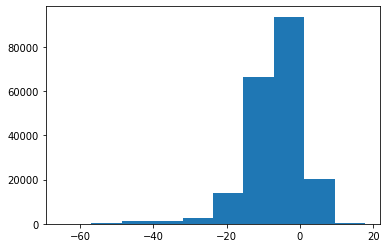

In [60]:
plt.hist(raw_data['diff'])

In [61]:
raw_data[raw_data['diff']<-60]

,trade id,pred edge,stock,location,price,size,dir,counterparty,counterparty (naive),sm sentiment,sm sentiment (naive),realized edge,pnl,diff
20645,20645,9.397793,A,CSE,39.916098,514.0,S,R,R,99.881899,-34.340537,-51.308175,-105.268337,-60.705968
28823,28823,21.929996,B,CSE,100.235840,158.0,B,R,R,-99.383462,-99.383462,-43.316405,-68.601328,-65.246400
38690,38690,8.780188,B,CSE,100.403817,286.0,B,R,R,-99.404492,-99.404492,-52.969396,-152.104226,-61.749584


In [62]:
pd.DataFrame(raw_data['counterparty'].value_counts())

,counterparty
MF,90056
R,69989
HF,39955


In [63]:
counterparty_data = pd.DataFrame(index=['HF','MF','R'], columns = ['count','avg pred edge', 'avg actual edge','average pnl',
                                               'percent good pred'])
counterparty_data['count'] = raw_data['counterparty'].value_counts()
for i in counterparty_data.index:
    print(np.mean(raw_data[raw_data['counterparty']==i]['realized edge']))

-4.788422579674743
1.414207498413837
3.6707357871402535


In [64]:
counterparty_data['avg expected edge'] = [1,2,3]

In [65]:
counterparty_data

,count,avg pred edge,avg actual edge,average pnl,percent good pred,avg expected edge
HF,39955,NaN,NaN,NaN,NaN,1
MF,90056,NaN,NaN,NaN,NaN,2
R,69989,NaN,NaN,NaN,NaN,3


In [66]:
raw_data['size']*raw_data['price']>20000

0         False
1         False
2         False
3         False
4         False
          ...  
199995    False
199996    False
199997    False
199998    False
199999    False
Length: 200000, dtype: bool

In [67]:
np.mean(raw_data[raw_data['size']*raw_data['price']<100]['realized edge'])

3.9472286061582915

In [68]:
np.mean(raw_data['realized edge'])

0.9647378665620432

In [69]:
raw_data[raw_data['counterparty']=='R']

,trade id,pred edge,stock,location,price,size,dir,counterparty,counterparty (naive),sm sentiment,sm sentiment (naive),realized edge,pnl,diff
2,2,12.306395,B,NYSE,99.818500,7.0,S,R,R,27.572105,27.572105,11.867307,0.829204,-0.439088
8,8,2.159811,A,NASDAQ,40.270332,131.0,S,R,R,-15.761249,-15.761249,2.979177,1.571639,0.819366
13,13,14.221260,C,CSE,14.765595,711.0,B,R,R,-74.104082,-38.990791,9.100667,9.554188,-5.120592
18,18,2.140908,A,NYSE,39.794659,556.0,S,R,MF,13.136803,23.438180,-0.684102,-1.513633,-2.825010
23,23,1.969855,C,NASDAQ,14.919354,543.0,S,R,HF,-34.415433,80.276657,3.018389,2.445260,1.048534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199983,199983,12.401104,C,NYSE,14.981323,701.0,B,R,R,9.502895,2.400193,14.043689,14.748552,1.642585
199993,199993,5.957446,B,NYSE,98.774688,90.0,B,R,R,-15.714849,-29.833391,0.665466,0.591580,-5.291980
199995,199995,1.035089,B,NYSE,98.290999,148.0,S,R,R,47.282761,74.037358,-4.003388,-5.823755,-5.038477
199997,199997,8.910650,D,NYSE,2020.034449,2.0,S,R,R,96.035708,96.035708,-25.712969,-10.388217,-34.623619


(array([20., 54., 75., 82., 31., 11.,  3.,  1.,  0.,  1.]),
 array([-15.31224475, -10.60843795,  -5.90463114,  -1.20082434,
          3.50298247,   8.20678927,  12.91059607,  17.61440288,
         22.31820968,  27.02201649,  31.72582329]),
 <a list of 10 Patch objects>)

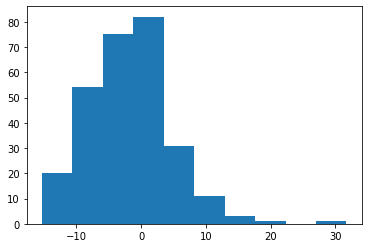

In [70]:
smalls = raw_data[raw_data['size']*raw_data['price']<100]

plt.hist(smalls[smalls['counterparty']=='HF']['realized edge'])

In [71]:
np.std(raw_data[raw_data['counterparty']=='MF']['diff'])

4.484447111043598

(array([ 3592., 10879., 19263., 33495., 43074., 46900., 29302., 11742.,
         1659.,    94.]),
 array([  0.        ,  23.14651218,  46.29302435,  69.43953653,
         92.5860487 , 115.73256088, 138.87907305, 162.02558523,
        185.1720974 , 208.31860958, 231.46512175]),
 <a list of 10 Patch objects>)

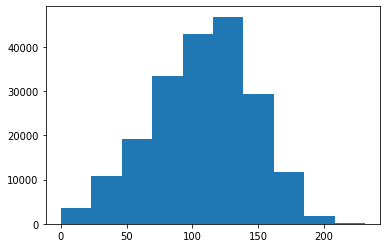

In [72]:
plt.hist(np.sqrt(raw_data['size']*raw_data['price']))

(array([6.2000e+01, 1.2100e+02, 4.9700e+02, 1.1170e+03, 2.5590e+03,
        7.9760e+03, 1.8762e+04, 5.2079e+04, 9.3934e+04, 2.1920e+04]),
 array([ 2.68918793,  3.50915498,  4.32912202,  5.14908907,  5.96905612,
         6.78902316,  7.60899021,  8.42895726,  9.24892431, 10.06889135,
        10.8888584 ]),
 <a list of 10 Patch objects>)

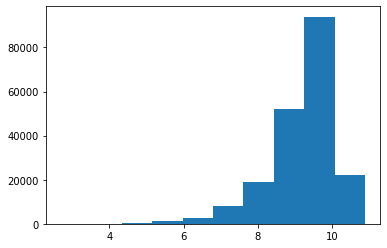

In [73]:
plt.hist(np.log([x for x in raw_data['size']*raw_data['price'] if x>10 and x<100000]))

In [74]:
ctype = np.zeros(shape=(200000))
for i,c in enumerate(raw_data['counterparty']):
    if(c=='R'):
        ctype[i]=3.671
    elif(c=='MF'):
        ctype[i]=1.414
    else:
        ctype[i]=-4.788
raw_data2 = raw_data.assign(encodedparty = ctype)
raw_data2 = raw_data2.assign(sqrtvolume = np.sqrt(raw_data2['size']*raw_data2['price']))
raw_data2

,trade id,pred edge,stock,location,price,size,dir,counterparty,counterparty (naive),sm sentiment,sm sentiment (naive),realized edge,pnl,diff,encodedparty,sqrtvolume
0,0,18.145986,B,CSE,98.507314,36.0,S,HF,MF,2.144241,-89.167775,-4.007551,-1.421183,-22.153537,-4.788,59.550511
1,1,14.414018,C,CSE,14.935761,1094.0,S,HF,R,-94.202156,83.379633,-3.716749,-6.073064,-18.130767,-4.788,127.826923
2,2,12.306395,B,NYSE,99.818500,7.0,S,R,R,27.572105,27.572105,11.867307,0.829204,-0.439088,3.671,26.433492
3,3,0.553884,B,CSE,100.459287,59.0,B,HF,MF,-45.020574,-40.040991,-16.951884,-10.047548,-17.505768,-4.788,76.987648
4,4,5.020094,C,NASDAQ,15.209969,449.0,S,MF,HF,22.575639,22.575639,-2.337918,-1.596629,-7.358012,1.414,82.639435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,1.035089,B,NYSE,98.290999,148.0,S,R,R,47.282761,74.037358,-4.003388,-5.823755,-5.038477,3.671,120.611226
199996,199996,3.668662,C,NASDAQ,15.003929,327.0,S,MF,MF,-59.582576,-66.851010,0.522307,0.256259,-3.146355,1.414,70.044878
199997,199997,8.910650,D,NYSE,2020.034449,2.0,S,R,R,96.035708,96.035708,-25.712969,-10.388217,-34.623619,3.671,63.561536
199998,199998,4.287823,B,NYSE,99.224065,127.0,S,R,MF,-90.732796,-90.732796,3.013510,3.797461,-1.274313,3.671,112.256208


In [77]:
X = raw_data2[['sqrtvolume', 'encodedparty', 'pred edge', 'sm sentiment']]
X = sm.add_constant(X)
model = sm.OLS(raw_data2['realized edge'], X).fit()
predictions = model.predict(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [78]:
np.mean(predictions-raw_data2['realized edge'])

-2.5301427619695005e-15

In [79]:
np.mean(raw_data2['pred edge']-raw_data2['realized edge'])

7.019115032330559

In [80]:
tmp = raw_data[predictions>0]
for i in list('ABCD'):
    tmp2 = tmp[tmp['stock']==i]
    print('Total pnl of {} over {} trades on stock {}, ratio {}'.format(np.sum(tmp2['pnl']), len(tmp2), i, np.sum(tmp2['pnl'])/len(tmp2)))

Total pnl of 129278.37210421122 over 20789 trades on stock A, ratio 6.218595031228593
Total pnl of 136877.57903082386 over 31169 trades on stock B, ratio 4.391465206802396
Total pnl of 283831.5867567486 over 36170 trades on stock C, ratio 7.847154734773254
Total pnl of 139687.23640143598 over 15692 trades on stock D, ratio 8.901812159153453


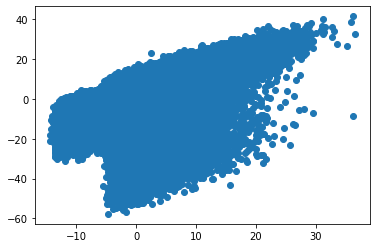

In [81]:
plt.scatter(predictions, raw_data2['realized edge'])

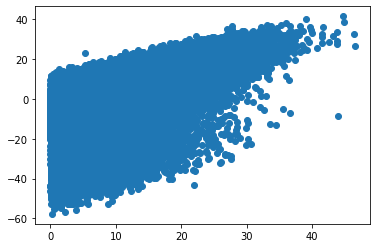

In [82]:
plt.scatter(raw_data2['pred edge'], raw_data2['realized edge'])

In [83]:
np.sum(raw_data[predictions>0]['pnl'])

689674.7742932197

In [84]:
np.sum(raw_data[predictions>0]['pnl'])

689674.7742932197

In [85]:
raw_data_test = raw_data[120000:160000]
raw_data_train = raw_data[0:120000].append(raw_data[160000:200000])

In [86]:
raw_data_train = raw_data[0:160000]
raw_data_test = raw_data[160000:200000]

In [87]:
ctype = np.zeros(shape=(160000))
#counterCoef = {'R':1, 'MF':0, 'HF':-1}
counterCoef = {'R':3.671, 'MF':1.414, 'HF':-4.788}
stockCoef = {'A':6.218, 'B':4.391, 'C':7.847, 'D':8.901}
exchangeCoef = {'NYSE':2.138, 'CSE':-2.791, 'NASDAQ':1.674}
#exchangeCoef = {'NYSE':2, 'CSE':-2, 'NASDAQ':1.5}
for i,c in enumerate(raw_data_train['counterparty']):
    ctype[i]=counterCoef[c]
raw_data_train2 = raw_data_train.assign(encodedparty = ctype).assign(sqrtvolume = np.sqrt(raw_data_train['size']*raw_data_train['price']))
for i,c in enumerate(raw_data_train['stock']):
    ctype[i]=stockCoef[c]
raw_data_train2 = raw_data_train2.assign(encodedstock = ctype)
for i,c in enumerate(raw_data_train['location']):
    ctype[i]=exchangeCoef[c]
raw_data_train2 = raw_data_train2.assign(encodedexchange = ctype)

ctype = np.zeros(shape=(40000))
for i,c in enumerate(raw_data_test['counterparty']):
    ctype[i]=counterCoef[c]
raw_data_test2 = raw_data_test.assign(encodedparty = ctype).assign(sqrtvolume = np.sqrt(raw_data_test['size']*raw_data_test['price']))
for i,c in enumerate(raw_data_test['stock']):
    ctype[i]=stockCoef[c]
raw_data_test2 = raw_data_test2.assign(encodedstock = ctype)
for i,c in enumerate(raw_data_test['location']):
    ctype[i]=exchangeCoef[c]
raw_data_test2 = raw_data_test2.assign(encodedexchange = ctype)


X = raw_data_train2[['sqrtvolume', 'encodedparty', 'pred edge', 'encodedstock', 'encodedexchange']]
Xtest = raw_data_test2[['sqrtvolume', 'encodedparty', 'pred edge', 'encodedstock', 'encodedexchange']]
X = sm.add_constant(X)
Xtest = sm.add_constant(Xtest)
model = sm.OLS(raw_data_train2['realized edge'], X).fit()
predictions = model.predict(Xtest)

traded = raw_data_test[predictions>0]
np.sum(traded['pnl'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


145694.50479840994

In [88]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          realized edge   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 3.189e+04
Date:                Sat, 12 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:25:14   Log-Likelihood:            -5.3218e+05
No. Observations:              160000   AIC:                         1.064e+06
Df Residuals:                  159994   BIC:                         1.064e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -10.9582      0.087   -125.981      0.000     -11.129     -10.788
sqrtvolume         -0.0261      0.000    -58.961      0.000      -0.027      -0.025
encodedparty        0.9966      0.006    180.033      0.000       0.986       1.007
pred edge           0.8985      0.003    321.670      0.000       0.893       0.904
encodedstock        0.8480      0.010     84.703      0.000       0.828       0.868
encodedexchange     1.0100      0.009    113.320      0.000       0.993       1.027
==============================================================================
Omnibus:                   120163.770   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2349327.295
Skew:                          -3.521   Prob(JB):                         0.00
Kurtosis:                      20.401   Cond. No.                         594.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
traded = raw_data_test[predictions>0]
np.sum(traded['pnl'])

145694.50479840994

In [90]:
np.sum(raw_data_test[raw_data_test['pred edge']>0]['pnl'])

10736.338766209632

In [91]:
np.sum(raw_data_test[raw_data_test['pnl']>0]['pnl'])

192377.560507163

In [92]:
tmp = raw_data_test[predictions>0]
for i in list('ABCD'):
    tmp2 = tmp[tmp['stock']==i]
    print('Total pnl of {} over {} trades on stock {}, ratio {}'.format(np.sum(tmp2['pnl']), len(tmp2), i, np.sum(tmp2['pnl'])/len(tmp2)))

Total pnl of 27729.00206287342 over 4077 trades on stock A, ratio 6.801325009289531
Total pnl of 30612.57999526004 over 4881 trades on stock B, ratio 6.271784469424306
Total pnl of 56941.73188839253 over 8182 trades on stock C, ratio 6.9593903554623
Total pnl of 30411.190851883926 over 4054 trades on stock D, ratio 7.501527097159331


In [93]:
tmp = raw_data_test[predictions>0]
tmp2 = tmp[tmp['stock']=='A']
np.sum(tmp2['pnl'])

27729.00206287342

(array([1.0000e+00, 0.0000e+00, 1.4000e+01, 5.2000e+01, 1.8000e+02,
        9.8100e+02, 1.8655e+04, 1.2550e+03, 5.4000e+01, 2.0000e+00]),
 array([-190.02707448, -159.2526658 , -128.47825712,  -97.70384844,
         -66.92943976,  -36.15503108,   -5.38062241,   25.39378627,
          56.16819495,   86.94260363,  117.71701231]),
 <a list of 10 Patch objects>)

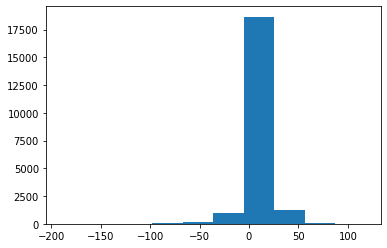

In [94]:
plt.hist(traded['pnl'])

In [95]:
traded[traded['realized edge']<-10]

,trade id,pred edge,stock,location,price,size,dir,counterparty,counterparty (naive),sm sentiment,sm sentiment (naive),realized edge,pnl,diff
160074,160074,3.476072,D,NASDAQ,2020.024690,5.0,B,R,R,-98.441439,-94.694644,-43.040679,-43.471617,-46.516751
160165,160165,12.973658,C,NYSE,14.695197,2000.0,S,HF,HF,-86.499750,-60.453137,-10.550900,-31.009510,-23.524558
160201,160201,5.606372,A,NASDAQ,39.908740,208.0,B,R,MF,-86.773257,-86.773257,-16.381884,-13.598631,-21.988255
160269,160269,5.861765,A,NASDAQ,40.375973,304.0,S,R,R,97.552806,97.552806,-35.696083,-43.814428,-41.557849
160300,160300,16.187559,C,NASDAQ,15.034889,675.0,S,R,R,91.277629,91.277629,-16.237570,-16.478779,-32.425129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199732,199732,8.400541,D,NASDAQ,2003.331506,8.0,S,MF,MF,-25.795731,-25.795731,-10.719811,-17.180269,-19.120352
199818,199818,4.339866,D,NASDAQ,1962.451575,4.0,B,R,MF,-90.720605,-90.720605,-18.811397,-14.766582,-23.151263
199901,199901,10.571808,B,NASDAQ,99.766494,45.0,S,R,R,87.872155,87.872155,-22.249871,-9.989062,-32.821679
199951,199951,1.389223,C,NYSE,15.024989,344.0,S,R,R,92.711745,92.711745,-35.037828,-18.109639,-36.427050


In [96]:
losses = traded[traded['realized edge']<-10]
for i in ['R', 'MF', 'HF']:
    print(np.mean(losses[losses['counterparty']==i]['realized edge']))

-25.786016081090324
-12.884953888900345
-11.651580186113197


In [97]:
with pd.option_context('display.max_rows', None):
  display(traded.sort_values(by=['pnl'])[0:100])

,trade id,pred edge,stock,location,price,size,dir,counterparty,counterparty (naive),sm sentiment,sm sentiment (naive),realized edge,pnl,diff
198704,198704,13.224249,A,NYSE,40.955944,1112.0,S,R,R,98.179984,24.876811,-41.724751,-190.027074,-54.949000
172508,172508,11.007465,C,CSE,15.008969,2375.0,B,R,R,-93.433798,-93.433798,-33.924940,-120.929861,-44.932404
161829,161829,5.244314,C,NASDAQ,15.094955,1729.0,S,R,R,97.865882,97.865882,-44.028077,-114.909654,-49.272391
174414,174414,5.546981,C,NYSE,14.991581,1975.0,B,R,R,-96.224440,-96.224440,-37.986006,-112.470381,-43.532987
180950,180950,9.136495,C,CSE,14.887359,1930.0,B,R,R,-93.229454,67.878419,-38.483251,-110.572399,-47.619746
198118,198118,5.898273,C,NYSE,15.179089,1754.0,B,R,R,-97.059058,-97.059058,-41.316261,-110.000919,-47.214534
161673,161673,5.857905,C,NYSE,14.947813,1590.0,B,R,R,-99.993306,-11.719715,-45.306842,-107.680873,-51.164747
174596,174596,6.864990,C,NASDAQ,14.910071,1653.0,S,R,MF,99.224326,99.224326,-43.543440,-107.318673,-50.408430
191360,191360,6.558550,A,NYSE,40.337800,641.0,S,R,R,97.333628,97.333628,-41.104314,-106.281492,-47.662865
194688,194688,11.113793,C,NASDAQ,15.109759,2168.0,B,R,R,-97.523250,62.220795,-32.198072,-105.474309,-43.311865


In [98]:
losses = traded[traded['realized edge']<-10]
for i in ['NYSE', 'CSE', 'NASDAQ']:
    print(np.mean(traded[traded['location']==i]['realized edge']))

6.1200326218107515
5.027073719288107
5.810695533956249


In [99]:
for i in ['NYSE', 'CSE', 'NASDAQ']:
    print(np.mean(raw_data[raw_data['location']==i]['realized edge']))

2.1376908129288816
-2.790634582349761
1.673399583805603


In [100]:
'''
Total pnl of 129278.37210421122 over 20789 trades on stock A, ratio 6.218595031228593
Total pnl of 136877.57903082386 over 31169 trades on stock B, ratio 4.391465206802396
Total pnl of 283831.5867567486 over 36170 trades on stock C, ratio 7.847154734773254
Total pnl of 139687.23640143598 over 15692 trades on stock D, ratio 8.901812159153453

2.1376908129288816
-2.790634582349761
1.6733995838056035
'''

ctype = np.zeros(shape=(160000))
#counterCoef = {'R':1, 'MF':0, 'HF':-1}
counterCoef = {'R':3.671, 'MF':1.414, 'HF':-4.788}
stockCoef = {'A':6.218, 'B':4.391, 'C':7.847, 'D':8.901}
exchangeCoef = {'NYSE':2.138, 'CSE':-2.791, 'NASDAQ':1.674}
#exchangeCoef = {'NYSE':2, 'CSE':-2, 'NASDAQ':1.5}
dirDict = {'B':1, 'S':-1}

for i,c in enumerate(raw_data_train['counterparty']):
    ctype[i]=counterCoef[c]
raw_data_train2 = raw_data_train.assign(encodedparty = ctype).assign(sqrtvolume = np.sqrt(raw_data_train['size']*raw_data_train['price']))
for i,c in enumerate(raw_data_train['stock']):
    ctype[i]=stockCoef[c]
raw_data_train2 = raw_data_train2.assign(encodedstock = ctype)
for i,c in enumerate(raw_data_train['location']):
    ctype[i]=exchangeCoef[c]
raw_data_train2 = raw_data_train2.assign(encodedexchange = ctype)



ctype = np.zeros(shape=(40000))
for i,c in enumerate(raw_data_test['counterparty']):
    ctype[i]=counterCoef[c]
raw_data_test2 = raw_data_test.assign(encodedparty = ctype).assign(sqrtvolume = np.sqrt(raw_data_test['size']*raw_data_test['price']))
for i,c in enumerate(raw_data_test['stock']):
    ctype[i]=stockCoef[c]
raw_data_test2 = raw_data_test2.assign(encodedstock = ctype)
for i,c in enumerate(raw_data_test['location']):
    ctype[i]=exchangeCoef[c]
raw_data_test2 = raw_data_test2.assign(encodedexchange = ctype)


X = raw_data_train2[['sqrtvolume', 'encodedparty', 'pred edge', 'encodedstock', 'encodedexchange']]
Xtest = raw_data_test2[['sqrtvolume', 'encodedparty', 'pred edge', 'encodedstock', 'encodedexchange']]
X = sm.add_constant(X)
Xtest = sm.add_constant(Xtest)
model = sm.OLS(raw_data_train2['realized edge'], X).fit()
predictions = model.predict(Xtest)

traded = raw_data_test[predictions>0].assign(predicted = predictions)
np.sum(traded['pnl'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


145694.50479840994

In [101]:
ctype = np.zeros(shape=(160000))
for i,c in enumerate(raw_data_train['dir']):
    ctype[i]=dirDict[c]
ctype*raw_data_train['sm sentiment']

0         -2.144241
1         94.202156
2        -27.572105
3        -45.020574
4        -22.575639
            ...    
159995    25.575948
159996    72.666160
159997   -47.159594
159998   -42.425449
159999    90.055227
Name: sm sentiment, Length: 160000, dtype: float64

In [102]:
'''
Total pnl of 129278.37210421122 over 20789 trades on stock A, ratio 6.218595031228593
Total pnl of 136877.57903082386 over 31169 trades on stock B, ratio 4.391465206802396
Total pnl of 283831.5867567486 over 36170 trades on stock C, ratio 7.847154734773254
Total pnl of 139687.23640143598 over 15692 trades on stock D, ratio 8.901812159153453

2.1376908129288816
-2.790634582349761
1.6733995838056035
'''

ctype = np.zeros(shape=(len(raw_data_train)))
#counterCoef = {'R':1, 'MF':0, 'HF':-1}
counterCoef = {'R':3.671, 'MF':1.414, 'HF':-4.788}
stockCoef = {'A':6.218, 'B':4.391, 'C':7.847, 'D':8.901}
exchangeCoef = {'NYSE':2.138, 'CSE':-2.791, 'NASDAQ':1.674}
#exchangeCoef = {'NYSE':2, 'CSE':-2, 'NASDAQ':1.5}
dirDict = {'B':1, 'S':-1}

for i,c in enumerate(raw_data_train['counterparty']):
    ctype[i]=counterCoef[c]
raw_data_train2 = raw_data_train.assign(encodedparty = ctype).assign(sqrtvolume = np.sqrt(raw_data_train['size']*raw_data_train['price']))
for i,c in enumerate(raw_data_train['stock']):
    ctype[i]=stockCoef[c]
raw_data_train2 = raw_data_train2.assign(encodedstock = ctype)
for i,c in enumerate(raw_data_train['location']):
    ctype[i]=exchangeCoef[c]
raw_data_train2 = raw_data_train2.assign(encodedexchange = ctype)
for i,c in enumerate(raw_data_train['dir']):
    ctype[i]=dirDict[c]
raw_data_train2 = raw_data_train2.assign(sent = ctype*raw_data_train['sm sentiment'])


ctype = np.zeros(shape=(len(raw_data_test)))
for i,c in enumerate(raw_data_test['counterparty']):
    ctype[i]=counterCoef[c]
raw_data_test2 = raw_data_test.assign(encodedparty = ctype).assign(sqrtvolume = np.sqrt(raw_data_test['size']*raw_data_test['price']))
for i,c in enumerate(raw_data_test['stock']):
    ctype[i]=stockCoef[c]
raw_data_test2 = raw_data_test2.assign(encodedstock = ctype)
for i,c in enumerate(raw_data_test['location']):
    ctype[i]=exchangeCoef[c]
raw_data_test2 = raw_data_test2.assign(encodedexchange = ctype)
for i,c in enumerate(raw_data_test['dir']):
    ctype[i]=dirDict[c]
raw_data_test2 = raw_data_test2.assign(sent = ctype*raw_data_test['sm sentiment'])

X = raw_data_train2[['sqrtvolume', 'encodedparty', 'pred edge', 'encodedstock', 'encodedexchange', 'sent']]
Xtest = raw_data_test2[['sqrtvolume', 'encodedparty', 'pred edge', 'encodedstock', 'encodedexchange', 'sent']]
X = sm.add_constant(X)
Xtest = sm.add_constant(Xtest)
model = sm.OLS(raw_data_train2['realized edge'], X).fit()
predictions = model.predict(Xtest)

traded = raw_data_test[predictions>0]
display(np.sum(traded['pnl']))
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


151851.1539586364

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          realized edge   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                 3.036e+04
Date:                Sat, 12 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:41:13   Log-Likelihood:            -5.2669e+05
No. Observations:              160000   AIC:                         1.053e+06
Df Residuals:                  159993   BIC:                         1.053e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -10.9563      0.084   -130.357      0.000     -11.121     -10.792
sqrtvolume         -0.0261      0.000    -60.926      0.000      -0.027      -0.025
encodedparty        0.9947      0.005    185.954      0.000       0.984       1.005
pred edge           0.8990      0.003    333.109      0.000       0.894       0.904
encodedstock        0.8470      0.010     87.552      0.000       0.828       0.866
encodedexchange     1.0119      0.009    117.500      0.000       0.995       1.029
sent                0.0301      0.000    106.628      0.000       0.030       0.031
==============================================================================
Omnibus:                   106703.073   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1634025.972
Skew:                          -3.048   Prob(JB):                         0.00
Kurtosis:                      17.420   Cond. No.                         594.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

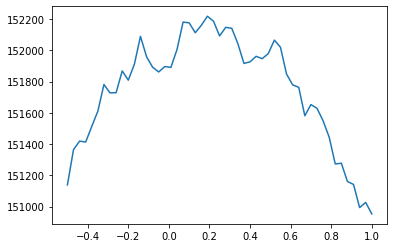

In [103]:
xs = np.zeros(shape=51)
for j,i in enumerate(np.linspace(-0.5,1.0,num=51)):
    traded = raw_data_test[predictions>i].assign(predicted = predictions)
    xs[j] = (np.sum(traded['pnl']))
plt.plot(np.linspace(-0.5, 1.0, num=51), xs)

In [105]:
#counterCoef = {'R':1, 'MF':0, 'HF':-1}
counterCoef = {'R':3.671, 'MF':1.414, 'HF':-4.788}
stockCoef = {'A':6.218, 'B':4.391, 'C':7.847, 'D':8.901}
exchangeCoef = {'NYSE':2.138, 'CSE':-2.791, 'NASDAQ':1.674}
#exchangeCoef = {'NYSE':2, 'CSE':-2, 'NASDAQ':1.5}
dirDict = {'B':1, 'S':-1}
def genAdditionalData(raw_data_train): 
    ctype = np.zeros(shape=(len(raw_data_train)))
    for i,c in enumerate(raw_data_train['counterparty']):
        ctype[i]=counterCoef[c]
    raw_data_train2 = raw_data_train.assign(encodedparty = ctype).assign(sqrtvolume = np.sqrt(raw_data_train['size']*raw_data_train['price']))
    for i,c in enumerate(raw_data_train['stock']):
        ctype[i]=stockCoef[c]
    raw_data_train2 = raw_data_train2.assign(encodedstock = ctype)
    for i,c in enumerate(raw_data_train['location']):
        ctype[i]=exchangeCoef[c]
    raw_data_train2 = raw_data_train2.assign(encodedexchange = ctype)
    for i,c in enumerate(raw_data_train['dir']):
        ctype[i]=dirDict[c]
    raw_data_train2 = raw_data_train2.assign(sent = ctype*raw_data_train['sm sentiment'])
    return raw_data_train2

def genRegXRetail(raw_data_train2):
    X = raw_data_train2[['sqrtvolume' , 'pred edge', 'encodedstock', 'encodedexchange', 'sent']]
    X = sm.add_constant(X)
    return X

def genRegX(raw_data_train2):
    X = raw_data_train2[['sqrtvolume', 'encodedparty', 'pred edge', 'encodedstock', 'encodedexchange']]
    X = sm.add_constant(X)
    return X


In [106]:
retail_train = raw_data_train[raw_data_train['counterparty']=='R']
non_retail_train = raw_data_train[raw_data_train['counterparty']!='R']

retail_test = raw_data_test[raw_data_test['counterparty' ]=='R']
non_retail_test = raw_data_test[raw_data_test['counterparty']!='R']


retail_model = sm.OLS(retail_train['realized edge'], genRegXRetail(genAdditionalData(retail_train))).fit()
retail_predictions = retail_model.predict(genRegXRetail(genAdditionalData(retail_test)))

non_retail_model = sm.OLS(non_retail_train['realized edge'], genRegX(genAdditionalData(non_retail_train))).fit()
non_retail_predictions = non_retail_model.predict(genRegX(genAdditionalData(non_retail_test)))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [107]:
display(retail_model.summary())
display(non_retail_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          realized edge   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     8655.
Date:                Sat, 12 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:42:04   Log-Likelihood:            -2.0176e+05
No. Observations:               56017   AIC:                         4.035e+05
Df Residuals:                   56011   BIC:                         4.036e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -9.0560      0.193    -46.864      0.000      -9.435      -8.677
sqrtvolume         -0.0189      0.001    -19.154      0.000      -0.021      -0.017
pred edge           0.8950      0.006    143.591      0.000       0.883       0.907
encodedstock        1.0043      0.022     45.124      0.000       0.961       1.048
encodedexchange     1.0058      0.020     50.763      0.000       0.967       1.045
sent                0.0856      0.001    131.939      0.000       0.084       0.087
==============================================================================
Omnibus:                    20778.695   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            83229.663
Skew:                          -1.832   Prob(JB):                         0.00
Kurtosis:                       7.715   Cond. No.                         588.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          realized edge   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                 6.498e+04
Date:                Sat, 12 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:42:04   Log-Likelihood:            -2.8510e+05
No. Observations:              103983   AIC:                         5.702e+05
Df Residuals:                  103977   BIC:                         5.703e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -9.9678      0.060   -166.326      0.000     -10.085      -9.850
sqrtvolume         -0.0297      0.000    -96.998      0.000      -0.030      -0.029
encodedparty        0.9916      0.004    243.535      0.000       0.984       1.000
pred edge           0.8977      0.002    465.392      0.000       0.894       0.902
encodedstock        0.7553      0.007    109.009      0.000       0.742       0.769
encodedexchange     1.0158      0.006    164.687      0.000       1.004       1.028
==============================================================================
Omnibus:                    19635.478   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55183.878
Skew:                          -1.008   Prob(JB):                         0.00
Kurtosis:                       5.945   Cond. No.                         595.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
## FOR ACTUAL TEST DATA
actual_test_data = pd.read_csv('test.csv')

retail_train = raw_data[raw_data['counterparty (naive)']=='R']
non_retail_train = raw_data[raw_data['counterparty (naive)']!='R']
print(len(retail_train)+len(non_retail_train))

retail_test = actual_test_data[actual_test_data['counterparty (naive)']=='R']
non_retail_test = actual_test_data[actual_test_data['counterparty (naive)']!='R']
print(len(retail_test)+len(non_retail_test))


200000
100000


Index(['trade id', 'pred edge', 'stock', 'location', 'price', 'size', 'dir',
       'counterparty (naive)', 'sm sentiment (naive)'],
      dtype='object')